## Imoprting libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout , GRU
from tensorflow.keras.callbacks import EarlyStopping

import warnings
from warnings import filterwarnings
warnings.simplefilter(action='ignore')
%matplotlib inline

C:\Users\rhyth\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading dataset

In [2]:
df = pd.read_csv('data.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


## Preparing Dataset

In [3]:
df['Date'] = df['date'].str.split(' ').str.get(0)
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,Date
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0,2016-06-14
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0,2016-06-15
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0,2016-06-16
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0,2016-06-17
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0,2016-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0,2021-06-07
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0,2021-06-08
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0,2021-06-09
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0,2021-06-10


In [4]:
df.drop(columns=['date','symbol'],inplace=True)

In [5]:
df['Date']= pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
Date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [6]:
DF = df[['close','high','low','open']] 

In [7]:
scaler = MinMaxScaler()
DF[DF.columns] = scaler.fit_transform(DF)
DF.shape

(1258, 4)

In [8]:
training_size = round(len(DF) * 0.80) 

train_data = DF.iloc[:training_size,0:4]
test_data  = DF.iloc[training_size:,0:4]

train_data.shape, test_data.shape

((1006, 4), (252, 4))

In [9]:
def prepare_time_series_data(Data, window_size):
    sequences = []
    labels = []

    for i in range(len(Data) - window_size):
        sequence = Data[i : i + window_size]
        label = Data.iloc[i + window_size] 
        sequences.append(sequence)
        labels.append(label)
    
    return np.array(sequences), np.array(labels)

## Spliting Test-Train data

In [10]:
X_train, y_train = prepare_time_series_data(train_data,60)
X_test, y_test = prepare_time_series_data(test_data,60)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((946, 60, 4), (946, 4), (192, 60, 4), (192, 4))

## LSTM Model

In [12]:
length = 60
LSTM1 = Sequential()

LSTM1.add(LSTM(100,return_sequences=True,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(LSTM(100,return_sequences=False,input_shape=(length,X_train.shape[2])))
LSTM1.add(Dropout(0.2))
LSTM1.add(Dense(X_train.shape[2]))

LSTM1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [13]:
LSTM1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           42000     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 122804 (479.70 KB)
Trainable params: 122804 (479.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
early_stop = EarlyStopping(monitor='loss',patience=5)
early_stop

In [15]:
LSTM1.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test), batch_size=32,callbacks=[early_stop])

Epoch 1/30


30/30 [==============================] - 6s 68ms/step - loss: 0.0071 - mean_absolute_error: 0.0578 - val_loss: 0.0187 - val_mean_absolute_error: 0.1198
Epoch 2/30
30/30 [==============================] - 1s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0283 - val_loss: 0.0050 - val_mean_absolute_error: 0.0567
Epoch 3/30
30/30 [==============================] - 1s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0261 - val_loss: 0.0073 - val_mean_absolute_error: 0.0733
Epoch 4/30
30/30 [==============================] - 1s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - val_loss: 0.0023 - val_mean_absolute_error: 0.0373
Epoch 5/30
30/30 [==============================] - 1s 41ms/step - loss: 0.0012 - mean_absolute_error: 0.0252 - val_loss: 0.0033 - val_mean_absolute_error: 0.0452
Epoch 6/30
30/30 [==============================] - 1s 41ms/step - loss: 0.0010 - mean_absolute_error: 0.0237 - val_loss: 0.0038 - val_mean_absolute_error: 0.0490
Epoch 7/30
30/30 [==

## Saving and Evaluting model

In [28]:
LSTM1.save('LSTM_model.h5')

In [17]:
LSTM1.history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

In [18]:
def predict_and_inverse_transform(DF, X_test, model, scaler):
    
    test = DF.iloc[-len(X_test):].copy()
    
    predictions = model.predict(X_test)
    inverse_predictions = scaler.inverse_transform(predictions)
    inverse_predictions = pd.DataFrame(inverse_predictions,columns=['Predicted Close', 'Predicted High',
                        'Predicted Low', 'Predicted Open'],index=DF.iloc[-len(X_test):].index)
    
    test_df = pd.concat([test.copy(), inverse_predictions], axis=1)
    test_df[['close', 'high', 'low', 'open']] = scaler.inverse_transform(test_df[['close', 'high', 'low', 'open']])
    
    return test_df

In [19]:
test_df = predict_and_inverse_transform(DF, X_test, LSTM1, scaler)

6/6 [==============================] - 1s 17ms/step


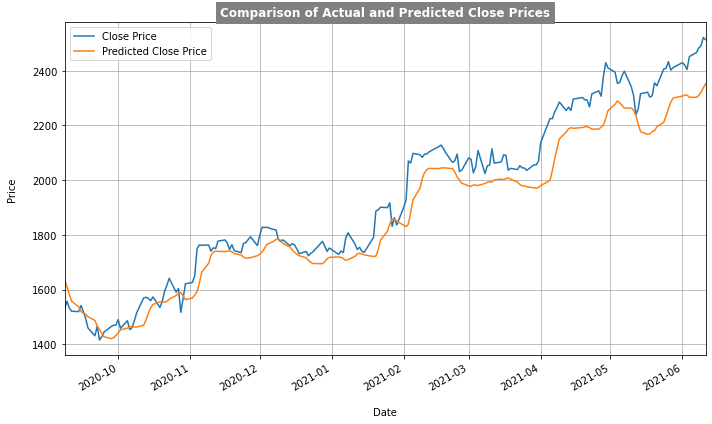

In [20]:
plt.figure(figsize=(10, 6))
test_df['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white', fontweight='bold')  
plt.xlabel('Date',labelpad=15)
plt.ylabel('Price',labelpad=15)
plt.grid(True)
plt.tight_layout()

## Another LSTM model 

In [21]:
LSTM2 = Sequential()

# First LSTM layer
LSTM2.add(LSTM(150, input_shape=(length,X_train.shape[2]), return_sequences=True))
LSTM2.add(Dropout(0.2))

# Second LSTM layer
LSTM2.add(LSTM(100, input_shape=(length,X_train.shape[2]), return_sequences=True))
LSTM2.add(Dropout(0.2))

# Third LSTM layer 
LSTM2.add(LSTM(100, input_shape=(length,X_train.shape[2]), return_sequences=False)) 
LSTM2.add(Dropout(0.2))

# Final Prediction (one neuron per feature)
LSTM2.add(Dense(units=50))
LSTM2.add(Dense(units=5))
LSTM2.add(Dense(X_train.shape[2]))

LSTM2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [22]:
LSTM2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 150)           93000     
                                                                 
 dropout_2 (Dropout)         (None, 60, 150)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           100400    
                                                                 
 dropout_3 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)               

In [23]:
LSTM2.fit(X_train, y_train,epochs=30,validation_data=(X_test, y_test),batch_size = 32,callbacks=[early_stop],verbose=1)

Epoch 1/30
30/30 [==============================] - 8s 107ms/step - loss: 0.0093 - mean_absolute_error: 0.0649 - val_loss: 0.0148 - val_mean_absolute_error: 0.0954
Epoch 2/30
30/30 [==============================] - 2s 71ms/step - loss: 0.0020 - mean_absolute_error: 0.0326 - val_loss: 0.0207 - val_mean_absolute_error: 0.1269
Epoch 3/30
30/30 [==============================] - 2s 71ms/step - loss: 0.0015 - mean_absolute_error: 0.0280 - val_loss: 0.0186 - val_mean_absolute_error: 0.1194
Epoch 4/30
30/30 [==============================] - 2s 71ms/step - loss: 0.0013 - mean_absolute_error: 0.0262 - val_loss: 0.0078 - val_mean_absolute_error: 0.0718
Epoch 5/30
30/30 [==============================] - 2s 72ms/step - loss: 0.0011 - mean_absolute_error: 0.0234 - val_loss: 0.0173 - val_mean_absolute_error: 0.1154
Epoch 6/30
30/30 [==============================] - 2s 72ms/step - loss: 9.6786e-04 - mean_absolute_error: 0.0223 - val_loss: 0.0129 - val_mean_absolute_error: 0.0986
Epoch 7/30
30/30 

## Saving and Evaluting model

In [29]:
LSTM2.save('LSTM2_model.h5')

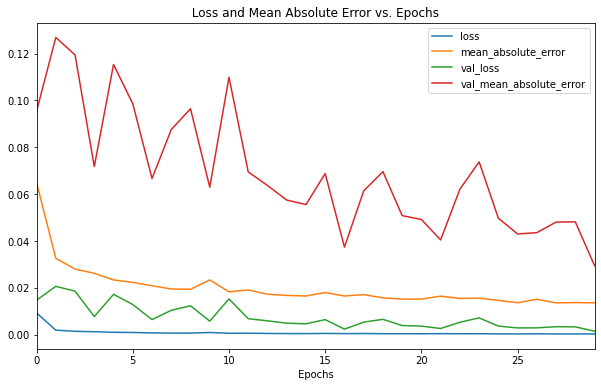

In [25]:
title=' Loss and Mean Absolute Error vs. Epochs '
xlabel=' Epochs '
LSTM2_losses = pd.DataFrame(LSTM2.history.history)

ax = LSTM2_losses.plot(figsize=(10,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel);

In [26]:
test_df2 = predict_and_inverse_transform(DF, X_test, LSTM2, scaler)

6/6 [==============================] - 1s 27ms/step


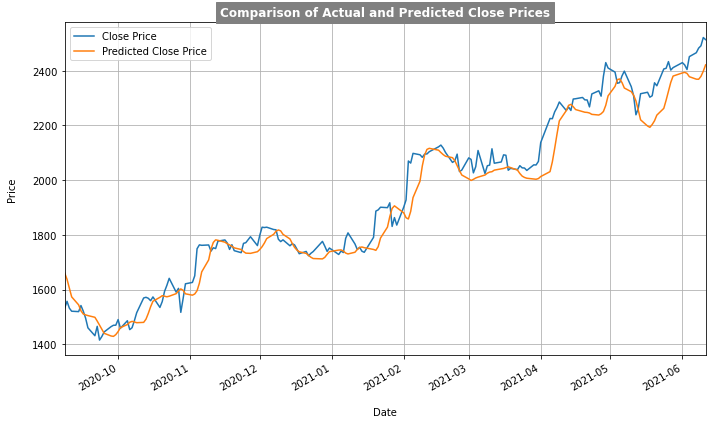

In [27]:
plt.figure(figsize=(10, 6))
test_df2['close'].plot(label='Close Price').autoscale(axis='x',tight=True)
test_df2['Predicted Close'].plot(label='Predicted Close Price').autoscale(axis='x',tight=True)

plt.legend()
plt.title('Comparison of Actual and Predicted Close Prices',backgroundcolor='grey',color='white', fontweight='bold')  
plt.xlabel('Date',labelpad=15)
plt.ylabel('Price',labelpad=15)
plt.grid(True)
plt.tight_layout()
plt.show()